# Исследование данных пользователей сервиса самокатов GoFast.

**ОПИСАНИЕ ПРОЕКТА**

*Для поездок по городу, пользователи сервиса GoFast пользуются мобильным приложением.*

Сервисом можно пользоваться:
без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;

с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.


**ЦЕЛЬ ПРОЕКТА**
* Проанализировать данные, с помощью объединения предоставленных датафреймов;
* Сделать визуализацию информации о расстоянии и времени поездок для пользователей с подпиской и без;
* Произвести подсчет выручки сервиса GoFast;
* Проверить некоторые гипотезы, которые могут помочь бизнесу GoFast вырасти;
* Разработать рекомендации отделу маркетинга сервиса GoFast по оптимизации рекламных кампаний.

## Изучим общую информацию о данных

**Импортируем необходимые для работы над проектом библиотеки.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
from math import sqrt

**Считаем данные из csv-файлов в датафреймы, сохраним в переменные `users_go`, `rides_go`, `subs_go`. Выведем на печать часть всех таблиц.**

In [2]:
users_go = pd.read_csv(r"D:\WinUsers\Lenovo\Desktop\ПРОЕКТНЫЕ ФАЙЛЫ.CSV\Спринт_4. Статистический анализ\users_go.csv")
print(f'Таблица пользователей: \n {users_go.head()}, \n')
rides_go = pd.read_csv(r"D:\WinUsers\Lenovo\Desktop\ПРОЕКТНЫЕ ФАЙЛЫ.CSV\Спринт_4. Статистический анализ\rides_go.csv")
print(f'Таблица поездок: \n {rides_go.tail()}, \n')
subs_go = pd.read_csv(r"D:\WinUsers\Lenovo\Desktop\ПРОЕКТНЫЕ ФАЙЛЫ.CSV\Спринт_4. Статистический анализ\subscriptions_go.csv")
print(f'Таблица подписок: \n {subs_go.head()}, \n')

Таблица пользователей: 
    user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra, 

Таблица поездок: 
        user_id     distance   duration        date
18063     1534  3781.098080  19.822962  2021-11-04
18064     1534  2840.423057  21.409799  2021-11-16
18065     1534  3826.185507  18.435051  2021-11-18
18066     1534  2902.308661  16.674362  2021-11-27
18067     1534  2371.711192  15.893917  2021-12-29, 

Таблица подписок: 
   subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199, 



**Выведем информацию о датафреймах на экран, проверим датафреймы на наличие явных дубликатов методом `duplicated`.**

In [3]:
print(f'{users_go.info()}, \n')
print(f'Количество явных дубликатов: {users_go.duplicated().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None, 

Количество явных дубликатов: 31


In [4]:
print(f'{rides_go.info()}, \n')
print(f'Количество явных дубликатов: {rides_go.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None, 

Количество явных дубликатов: 0


In [5]:
subs_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


**Построим гистограммы для всех числовых столбцов таблиц.**

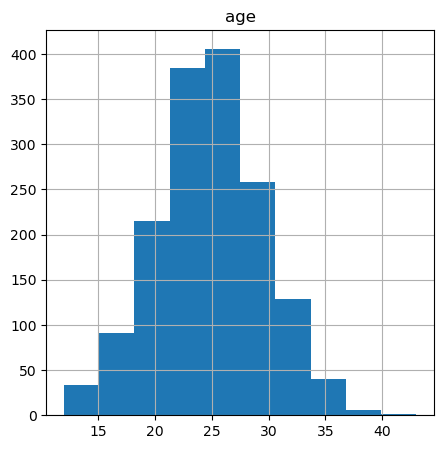

In [6]:
users_go.hist('age', figsize=(5, 5))
plt.show()

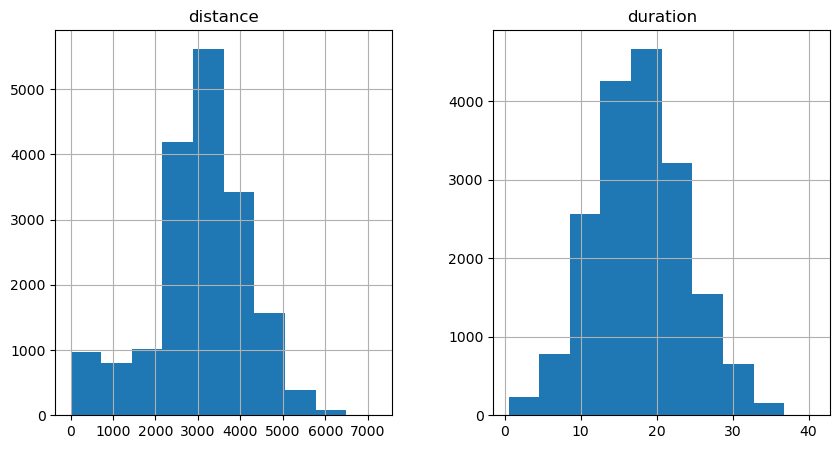

In [7]:
rides_go.hist(['distance', 'duration'], figsize=(10, 5))
plt.show()

<div class="alert alert-info"> <b>Вывод:</b>
    
Проанализировали общую информацию о данных:
    
- Первый датафрейм `users_go`: 1565 записей, пропущенных значений нет, явных дубликатов 31, корректный тип данных. 
- Второй датафрейм `rides_go`: 18068 записей, пропущенных значений нет, явные дубликаты отсутствуют, есть некорректный тип данных. 
- Третий датафрейм `subs_go`: 2 записи, пропущенных значений нет, явные дубликаты отсутствуют, корректный тип данных. 
- Данные признаны полными и достаточными для исследования.
</div>  

## Предобработка данных

**Предобработаем данные из датафрейма `users_go`. Удалим явные дубликаты**

In [8]:
users_go = users_go.drop_duplicates()
users_go.duplicated().sum()

0

**Предобработаем данные из датафрейма `rides_go`. Округлим данные столбца `distance` до 2-х знаков после запятой. Поменяем тип тип данных столбца `date`. Округлим значение столбца `duration` до целых чисел. Создадим новый столбец с номером месяца на основе столбца `date`. Создадим новый столбец с показателем средней скорости (км/ч) на основе столбцов `distance` и `duration`.**

In [9]:
rides_go['distance'] = rides_go['distance'].round(2)
rides_go['date'] = pd.to_datetime(rides_go['date'], format ='%Y-%m-%d')
rides_go['duration'] = np.ceil(rides_go['duration']).astype('int')
rides_go['month'] = rides_go['date'].dt.month
rides_go['average_speed'] = round((rides_go['distance'] / rides_go['duration']) * 0.06, 2)
rides_go.head()

,user_id,distance,duration,date,month,average_speed
0,1,4409.92,26,2021-01-01,1,10.18
1,1,2617.59,16,2021-01-18,1,9.82
2,1,754.16,7,2021-04-20,4,6.46
3,1,2694.78,19,2021-08-11,8,8.51
4,1,4028.69,27,2021-08-28,8,8.95


**Предобрабатывать данные из датафрейма `subs_go` нет необходимости.**

<div class="alert alert-info"> <b>Вывод:</b>
    
Провели предобработку данных:
    
Датафрейм `users_go`:    
- удалили явные дубликаты.
    
Датафрейм `rides_go`:
- округлили данные в столбце `distance` до 2-х знаков до запятой;
- значения из столбца `duration` округлили с помощью «потолка»;
- поменяли тип данных в столбце `date`;
- создали столбец `month` с номером месяца на основе столбца `date`;
- создали столбец `average_speed` со средней скоростью на основе столбцов `distance`, `duration`.
    
Датафрейм `subs_go`:
- оставили всё без изменений. 
</div> 

## Исследовательский анализ данных

**Анализ распределения количества пользователей по городам.**

In [10]:
users_go['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

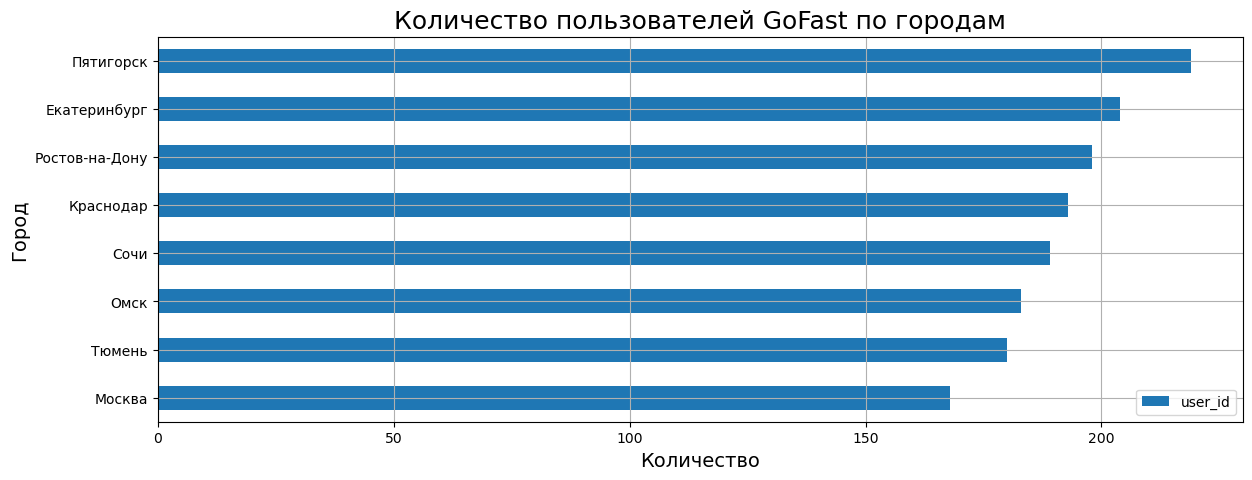

In [11]:
users_go.pivot_table(index='city', values='user_id', aggfunc='count')\
.sort_values(by='user_id', ascending=True)\
.plot(grid=True, kind='barh', figsize=(14, 5))
plt.title('Количество пользователей GoFast по городам', fontsize=18)
plt.xlabel('Количество', fontsize=14)
plt.ylabel('Город', fontsize=14)
plt.show()

*Наибольшее количество пользователей сервиса GoFast приходится на южные города, что в общем-то и понятно ведь для использования самокатов природные условия наиболее благоприятные. На первом месте находится Пятигорск - 219 пользователей, а в топ-5 четыре южных города, единственная неожиданность второе место уральского города Екатеринбург.*

**Анализ соотношения количества пользователей с подпиской и без подписки.**

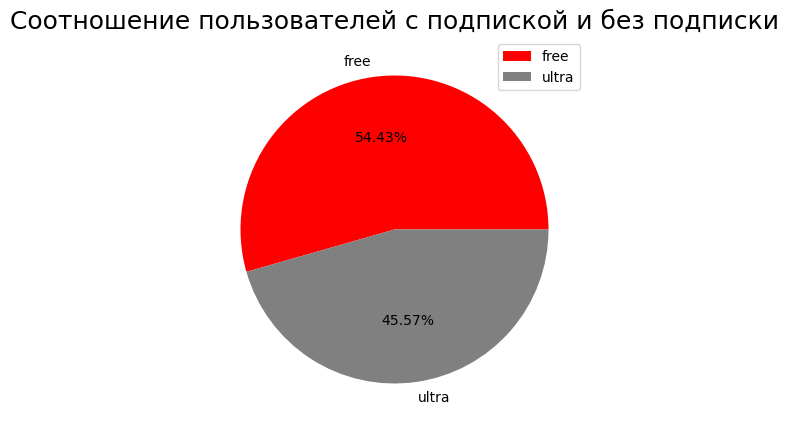

In [12]:
users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')\
.sort_values('user_id', ascending=False)\
.plot.pie(y='user_id', figsize=(5,5),
label='',          
autopct='%0.2f%%',
colors = ['red', 'grey'])
plt.title('Соотношение пользователей с подпиской и без подписки', fontsize=18)
plt.show()


*Количество пользователей без подписки составляет 54,43%, а пользователей с подпиской 45.57%. Отделу маркетинга сервиса GoFast есть куда стремиться.*

**Анализ распределения количества пользователей по возрасту.**

In [13]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

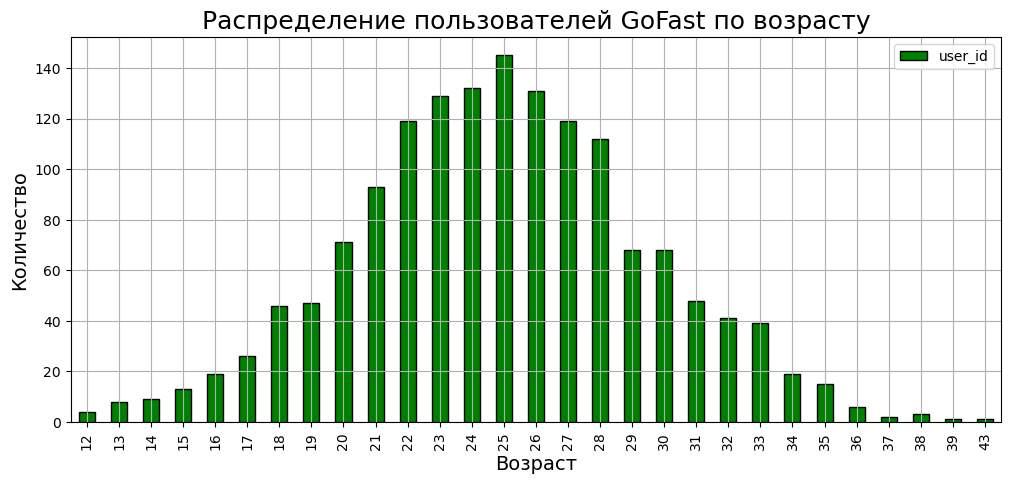

In [14]:
users_go.pivot_table(index='age', values='user_id', aggfunc='count')\
.sort_values(by='age', ascending=True)\
.plot(grid=True, kind='bar', color='g', figsize=(12, 5), edgecolor='black')
plt.title('Распределение пользователей GoFast по возрасту', fontsize=18)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('Возраст', fontsize=14)
plt.show()

*Распределение пользователей сервиса GoFast подчиняется нормальному распределению. Среднее 25 и медиана 24,9 практически совпадают. Как мы видим основной потребитель этой услуги молодые люди в возрасте 22-27 лет.*

**Анализ соотношения количества поездок в зависимости от расстояния.**

In [15]:
rides_go['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

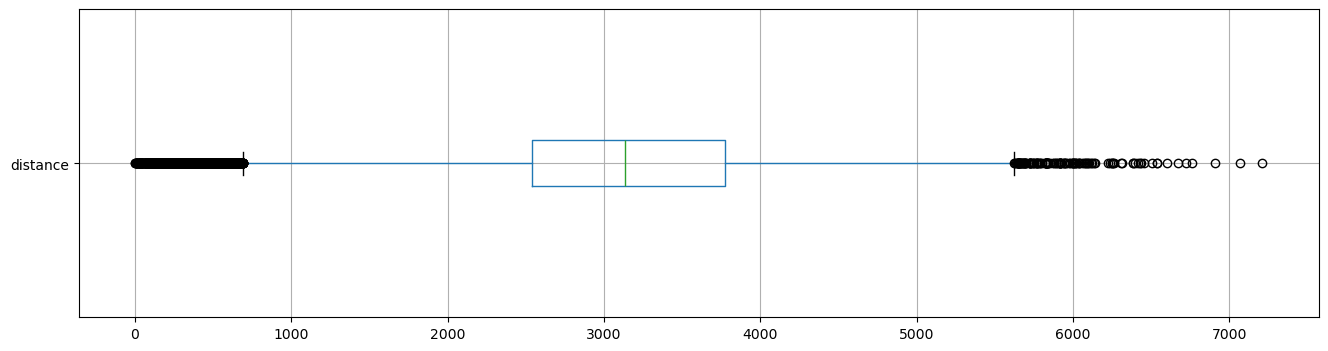

In [16]:
rides_go.boxplot(column=['distance'], vert=False, figsize=(16, 4))
plt.show()

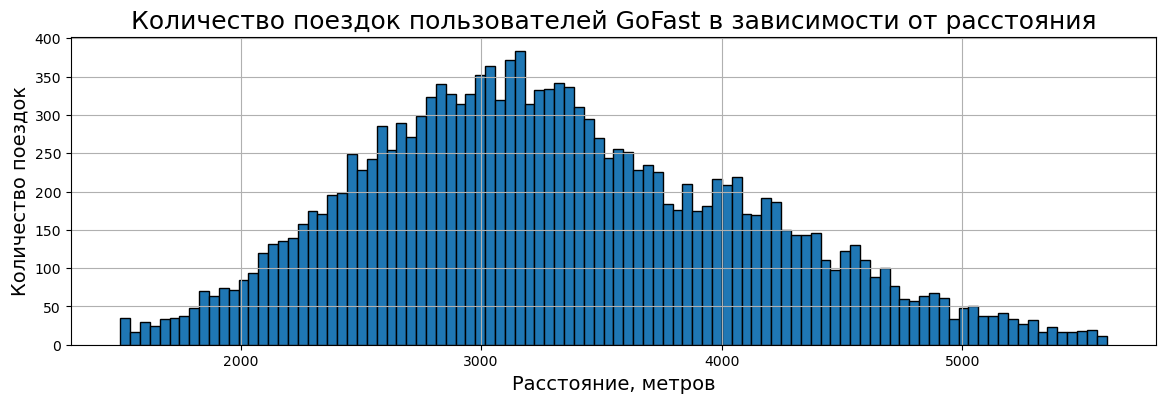

In [17]:
rides_go.hist(column = 'distance', bins = 100, range = (1500, 5600), figsize=(14,4), edgecolor='black')
plt.title('Количество поездок пользователей GoFast в зависимости от расстояния', fontsize=18)
plt.xlabel('Расстояние, метров', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.show()

*Среднее значение расстояния поездок 3070.65 м и медиана 3133.61 м отличаются, так как видно из диаграммы размаха есть выбросы за минимумом и за максимумом. В диапозоне range(1500, 5600) график будет подчиняться нормальному распределению. Выбросы в диапазоне от 0 до 1000 м возможно объясняются поломкой самоката, либо изменением планов клиента.*

**Анализ соотношения количества поездок в зависимости от их продолжительности.**

In [18]:
rides_go['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

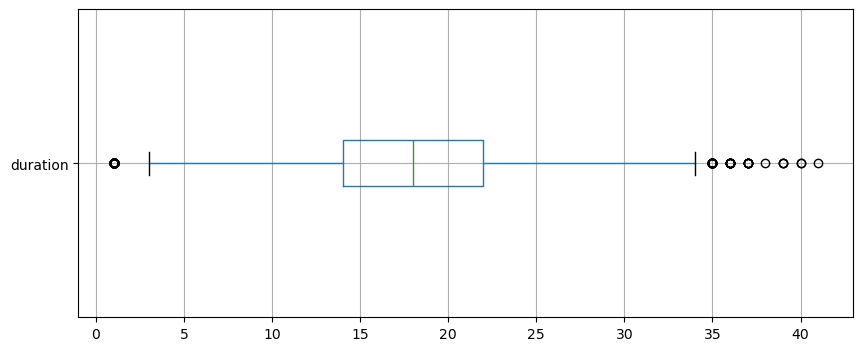

In [19]:
rides_go.boxplot(column=['duration'], vert=False, figsize=(10, 4))
plt.show()

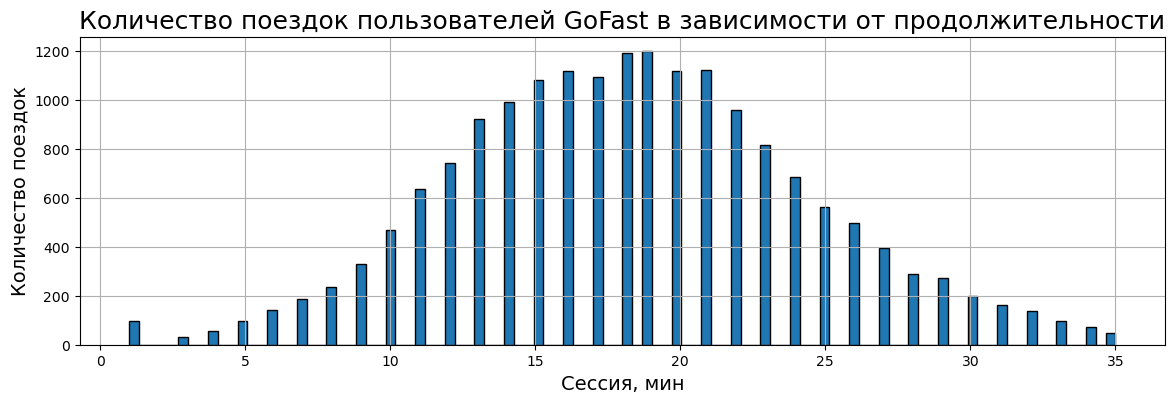

In [20]:
rides_go.hist(column = 'duration', bins = 100, range = (1, 35), figsize=(14,4), edgecolor='black')
plt.title('Количество поездок пользователей GoFast в зависимости от продолжительности', fontsize=18)
plt.xlabel('Сессия, мин', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.show()

*Среднее значение продолжительности поездок 18.3 мин и медиана 18 мин отличаются (в относительном процентном отношении примерно также, как и количество поездок 1,66% и 2,05% соответственно) , так как видно из диаграммы размаха есть выбросы за минимумом и за максимумом. В диапозоне range(1, 35) график будет подчиняться нормальному распределению. Выбросы в диапазоне до 1 мин возможно объясняются поломкой самоката, либо изменением планов клиента.*

**Анализ соотношения количества поездок в зависимости от средней скорости поездки.**

In [21]:
rides_go['average_speed'].describe()

count    18068.000000
mean        11.842608
std         21.961873
min          0.000000
25%          7.930000
50%          9.970000
75%         12.510000
max        432.660000
Name: average_speed, dtype: float64

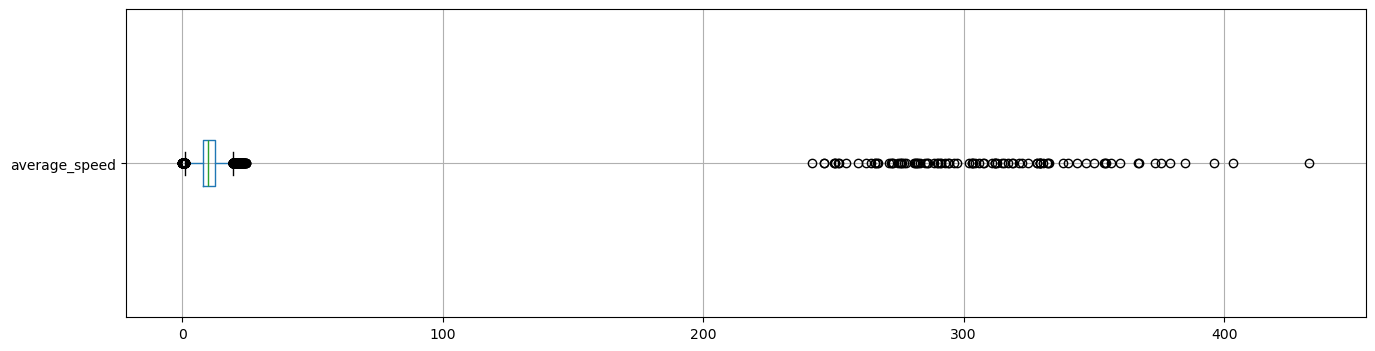

In [22]:
rides_go.boxplot(column=['average_speed'], vert=False, figsize=(16, 4))
plt.show()

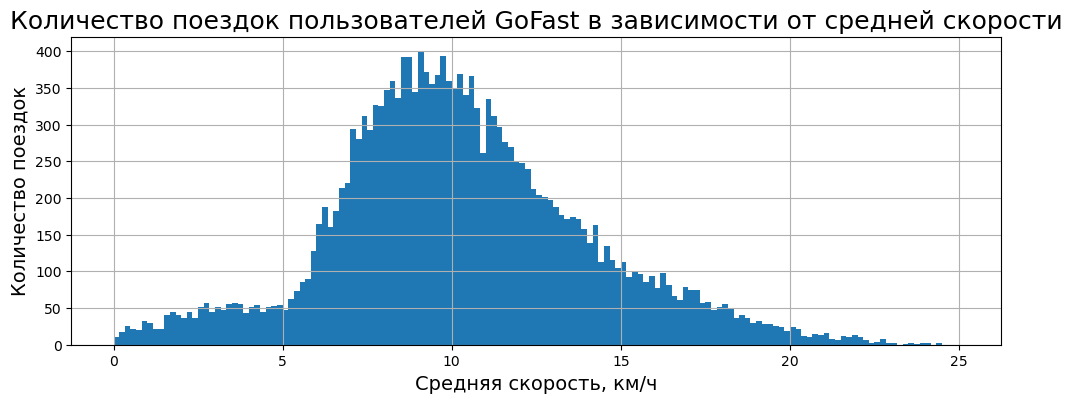

In [23]:
rides_go.hist(column = 'average_speed', bins = 150, range = (0, 25), figsize=(12,4))
plt.title('Количество поездок пользователей GoFast в зависимости от средней скорости', fontsize=18)
plt.xlabel('Средняя скорость, км/ч', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.show()

*Среднее значение средней скорости 9.97 км/ч и медиана 11.84 км/ч , так как наблюдаются на  диаграмме размаха аномальные значения за максимумом. Аномальные значения средней скорости варьируюся от 230 до свыше 400 км/ч (нереальные показатели), что является скорее всего явным программным сбоем. Вопрос к технической службе сервиса GoFast.*

<div class="alert alert-info"> <b>Вывод:</b>
    
Провели исследовательский анализ данных:
    
- Наибольшее количество пользователей сервиса GoFast приходится на южные города, что в общем-то и понятно ведь для использования самокатов природные условия наиболее благоприятные. На первом месте находится Пятигорск - 219 пользователей, а в топ-5 четыре южных города, единственная неожиданность второе место уральского города Екатеринбург. 
- Количество пользователей без подписки составляет 54,43%, а пользователей с подпиской 45.57%. Отделу маркетинга сервиса GoFast есть куда стремиться. 
- Распределение пользователей сервиса GoFast подчиняется нормальному распределению. Среднее 25 и медиана 24,9 практически совпадают. Как мы видим основной потребитель этой услуги молодые люди в возрасте 22-27 лет. 
- Среднее значение расстояния поездок 3070.65 м и медиана 3133.61 м отличаются, так как видно из диаграммы размаха есть выбросы за минимумом и за максимумом. В диапозоне range(1500, 5600) график будет подчиняться нормальному распределению. Выбросы в диапазоне от 0 до 1000 м возможно объясняются поломкой самоката, либо изменением планов клиента.
- Среднее значение продолжительности поездок 18.3 мин и медиана 18 мин отличаются (в относительном процентном отношении примерно также, как и количество поездок 1,66% и 2,05% соответственно) , так как видно из диаграммы размаха есть выбросы за минимумом и за максимумом. В диапозоне range(1, 35) график будет подчиняться нормальному распределению. Выбросы в диапазоне от 0 до 1 мин возможно объясняются поломкой самоката, либо изменением планов клиента.
- Среднее значение средней скорости 9.97 км/ч и медиана 11.84 км/ч , так как наблюдаются на  диаграмме размаха аномальные значения за максимумом. Аномальные значения средней скорости варьируюся от 230 до свыше 400 км/ч (нереальные показатели), что является скорее всего явным программным сбоем. Вопрос к технической службе сервиса GoFast.
</div>  

## Объединение данных

**Объединим три датафрейма `users_go`, `rides_go`, `subs_go` для дальнейшего анализа методом `merge`.**

In [24]:
users_rides = users_go.merge(rides_go, on='user_id')\
.merge(subs_go, on='subscription_type')

In [25]:
users_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  int32         
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int32         
 9   average_speed      18068 non-null  float64       
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(5), object(

**Создадим два датафрейма `users_rides_ultra`, `users_rides_free` c данными о пользователях с подпиской и без, на основе датафрейма  `users_rides` методом `query`.**

In [26]:
users_rides_free = users_rides.query('subscription_type == "free"' )

In [27]:
users_rides_ultra = users_rides.query('subscription_type == "ultra"' )

**Проверим правильность создания датафреймов `users_rides_ultra`, `users_rides_free`.**

In [28]:
if (len(users_rides_free) + len(users_rides_ultra)) == len(rides_go):
    print(f'Количество строк разделенных датафреймов соответствует исходному: {len(rides_go)}. Разделили правильно.')
else:
    print(f'Необходимо проверить код!!!')     

Количество строк разделенных датафреймов соответствует исходному: 18068. Разделили правильно.


**Получим числовое описание данных столбцов`distance` и `duration` датафреймов `users_rides_ultra`, `users_rides_free` методом `describe`.**

In [29]:
print(users_rides_ultra[['distance', 'duration']].describe())
print()
print(users_rides_free[['distance', 'duration']].describe())

          distance     duration
count  6500.000000  6500.000000
mean   3115.445431    19.037692
std     836.895369     5.577439
min     244.210000     4.000000
25%    2785.447500    15.000000
50%    3148.640000    19.000000
75%    3560.577500    22.000000
max    5699.770000    41.000000

           distance      duration
count  11568.000000  11568.000000
mean    3045.495284     17.890992
std     1246.173810      6.330250
min        0.860000      1.000000
25%     2366.560000     13.000000
50%     3114.650000     18.000000
75%     3905.695000     22.000000
max     7211.010000     35.000000


**Визуализируем информацию о расстоянии поездок для пользователей обеих категорий (с подпиской и без подписки).**

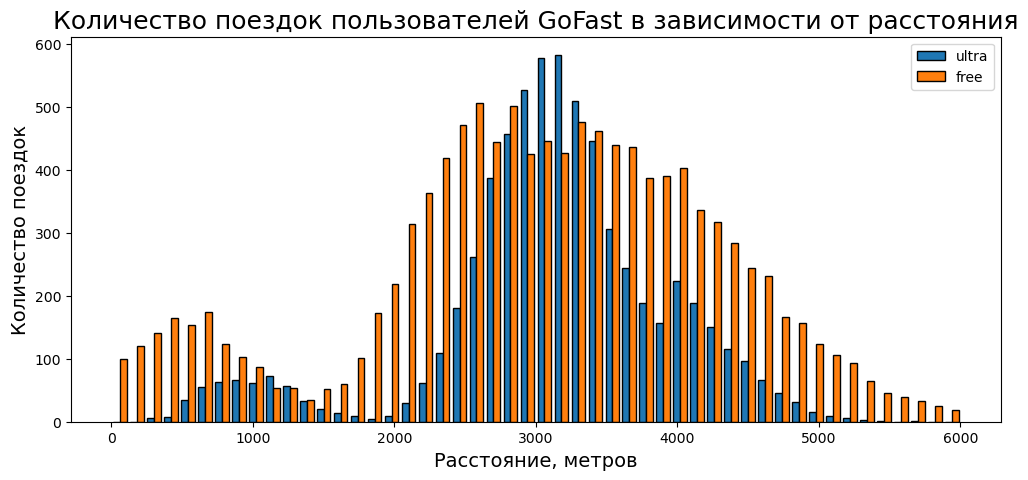

In [30]:
plt.figure(figsize=(12, 5))
plt.hist([users_rides_ultra['distance'], users_rides_free['distance']], bins=50, range=(1, 6000), label=['ultra', 'free'], edgecolor='black')
plt.legend()
plt.title('Количество поездок пользователей GoFast в зависимости от расстояния', fontsize=18)
plt.xlabel('Расстояние, метров', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.show()

**Визуализируем информацию о продолжительности поездок для пользователей обеих категорий (с подпиской и без подписки).**

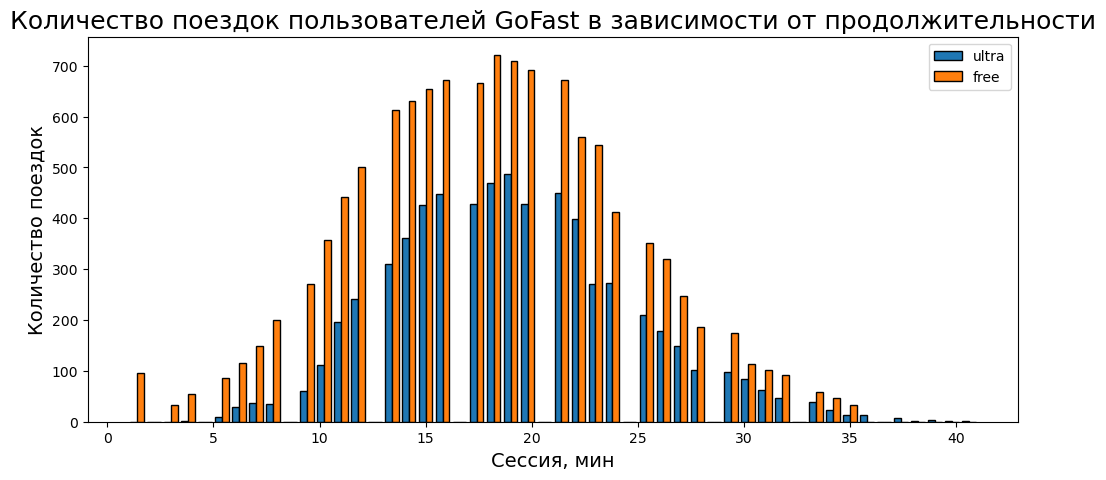

In [31]:
plt.figure(figsize=(12, 5))
plt.hist([users_rides_ultra['duration'], users_rides_free['duration']], bins=50, range=(1, 41), label=['ultra', 'free'], edgecolor='black')
plt.legend()
plt.title('Количество поездок пользователей GoFast в зависимости от продолжительности', fontsize=18)
plt.xlabel('Сессия, мин', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.show()

<div class="alert alert-info"> <b>Вывод:</b>
    
После объединения датафреймов провели анализ данных в разрезе подписки:
    
- На основании числового описания данных количества поездок по продолжительности методом `describe` и  их визуализации, можно сказать следующее у клиентов категорий  `ultra` и `free` соотношение показателей среднего расстояния  3115.44 метров и 3045.49 метров, медиана 3148.64 метров и 3114.65 метров соответственно. То есть в среднем пользователи с подпиской проезжают большее расстояние, но в тоже время максимально большие расстояния есть у пользователей без подписки. Разброс данных у пользователей категории `ultra` меньше, чем у пользователей категории `free` (стандартное отклонение `ultra` 836.89 против 1246.17 у `free`)
- На основании числового описания данных количества поездок на определенное расстояние методом `describe` и  их визуализации, можно сказать следующее у клиентов категорий  `ultra` и `free` соотношение показателей среднего расстояния  19.03 минут и 17.89 минут, медиана 19 минут и 18 минут соответственно. В среднем пользователи с подпиской тратят на поездки больше времени. Разброс данных у пользователей категории `ultra` меньше, чем у пользователей категории `free` (стандартное отклонение `ultra` 5.57 против 6.33 у `free`).
В целом можно сказать, что подписка положительно влияет на увеличение среднего расстояния и продолжительность поездки.
</div>  

## Подсчёт выручки

**Создадим датафрейм с агрегированными данными методом `pivot_table` о поездках на основе датафрейма `users_rides`: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [32]:
users_rides_income = users_rides.pivot_table(index=('subscription_type', 'user_id', 'month'),
                                            values=('distance',
                                                    'duration', 
                                                    'minute_price',
                                                    'start_ride_price',
                                                    'subscription_fee'),
                                             aggfunc=({'distance':{'count', 'sum'},
                                                      'duration':'sum',
                                                      'minute_price':'mean',
                                                      'start_ride_price':'mean',
                                                      'subscription_fee':'mean'})
                                            )

**Переименуем столбцы после применения метода `pivot_table`.**

In [33]:
users_rides_income.columns = ['count',
                              'distance',
                              'duration',
                              'minute_price',
                              'start_ride_price',
                              'subscription_fee']

**Создадим столбец `income` с помесячной выручкой.**

In [34]:
users_rides_income['income'] =  users_rides_income['duration']\
* users_rides_income['minute_price'] + users_rides_income['count']\
* users_rides_income['start_ride_price'] + users_rides_income['subscription_fee']

In [35]:
users_rides_income.tail()

count  distance  duration  minute_price  \
subscription_type user_id month                                            
ultra             699     6          1   4072.80        17           6.0   
                          8          2   7018.33        45           6.0   
                          9          2   6364.86        31           6.0   
                          10         1   4707.85        16           6.0   
                          12         1   3202.89        26           6.0   

                                 start_ride_price  subscription_fee  income  
subscription_type user_id month                                              
ultra             699     6                   0.0             199.0   301.0  
                          8                   0.0             199.0   469.0  
                          9                   0.0             199.0   385.0  
                          10                  0.0             199.0   295.0  
                          12                  0.0             199.0   355.0

**Получим числовое описание данных `users_rides_income` методом `describe`.**

In [36]:
users_rides_income.describe()

,count,distance,duration,minute_price,start_ride_price,subscription_fee,income
count,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000,11331.000000
mean,1.594564,4896.362611,29.186127,7.199894,29.997352,79.610537,342.303504
std,0.831604,2911.516657,16.752464,0.979861,24.496519,97.496144,153.875346
min,1.000000,2.570000,1.000000,6.000000,0.000000,0.000000,58.000000
25%,1.000000,2972.205000,17.000000,6.000000,0.000000,0.000000,234.000000
50%,1.000000,3988.720000,24.000000,8.000000,50.000000,0.000000,319.000000
75%,2.000000,6421.375000,38.000000,8.000000,50.000000,199.000000,415.000000
max,7.000000,23429.490000,143.000000,8.000000,50.000000,199.000000,1444.000000


**Создадим датафрейм с агрегированными данными методом `pivot_table` о поездках на основе датафрейма `users_rides_income`.**

In [37]:
ultra_free = users_rides_income.pivot_table(index=('subscription_type', 'month'),
                               values='income',
                               aggfunc=['mean', 'sum'])
ultra_free.columns = ['mean_income', 'sum_income']

**Создадим два датафрейма `ultra_income`, `free_income` c данными о пользователях с подпиской и без, на основе датафрейма  `users_rides_income` методом `query` для подсчёта помесячной выручки по разным категориям.**.

In [38]:
ultra_income = ultra_free.query('subscription_type == "ultra"')
free_income = ultra_free.query('subscription_type == "free"')

In [39]:
print('За период с', users_rides['date'].min(), 'по', users_rides['date'].max())
print('Общая выручка сервиса GoFast за 2021:', users_rides_income['income'].sum(), 'рублей')
print('Выручка сервиса GoFast за 2021 по категории "ultra":', ultra_income['sum_income'].sum(), 'рублей')
print('Выручка сервиса GoFast за 2021 по категории "free":', free_income['sum_income'].sum(), 'рублей')

За период с 2021-01-01 00:00:00 по 2021-12-30 00:00:00
Общая выручка сервиса GoFast за 2021: 3878641.0 рублей
Выручка сервиса GoFast за 2021 по категории "ultra": 1644537.0 рублей
Выручка сервиса GoFast за 2021 по категории "free": 2234104.0 рублей


<div class="alert alert-info"> <b>Вывод:</b>
    
Подсчет выручки:
    
- Общая выручка сервиса GoFast за 2021 составила: 3878641 рублей. 
- Выручка сервиса GoFast за 2021 по категории "ultra" составила: 1644537 рублей. 
- Выручка сервиса GoFast за 2021 по категории "free" составила: 2234104 рублей. 
</div>  

## Проверка гипотез

### Проверим гипотезу , тратят ли пользователи с подпиской больше времени на поездки, чем пользователи без подписки.

**Определим гипотезы:**

**Нулевая гипотеза $H_{0}$ - пользователи категорий `ultra` и `free` тратят одинаковое время н
а поездки**

**Альтернативная гипотеза (правосторонняя) $H_{1}$ - пользователи категории `ultra` тратят на поездки больше времени, чем пользователи категории `free`.**

**Используем метод `st.ttest_ind`.**

In [40]:
alpha = 0.05

results = st.ttest_ind(
    users_rides_ultra['duration'], 
    users_rides_free['duration'], 
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу $H_{0}$ - это говорит о том, что пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки при коэффициенте статистической значимости 5%.**

### Проверим гипотезу , что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает  3130 метров (расстояние одной поездки оптимальное с точки зрения износа самоката.).

**Определим гипотезы:**

**Нулевая гипотеза $H_{0}$ - среднее расстояние поездки пользователей категорий `ultra` равно 3130 метрам**

**Альтернативная гипотеза (правосторонняя) $H_{1}$ - среднее расстояние поездки пользователей категорий `ultra` превышает 3130 метров.**

**Используем метод `st.ttest_1samp`.**

In [41]:
distance = 3130 

alpha = 0.05 

results = st.ttest_1samp(
    users_rides_ultra['distance'],
    distance,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


**Не получилось отвергнуть $H_{0}$ значит пользователи с подпиской в среднем проезжают расстояние оптимальное с точки зрения износа самокатов равное 3130 метров при коэффициенте статистической значимости 5%.**

### Проверим гипотезу , будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

**Определим гипотезы:**

**Нулевая гипотеза $H_{0}$ - помесячная выручка пользователей категорий `ultra` и `free` одинаковая.**

**Альтернативная гипотеза (правосторонняя) $H_{1}$ - помесячная выручка пользователей категории `ultra` выше, чем у пользователей категории `free`.**

**Используем метод `st.ttest_ind`.**

In [42]:
alpha = 0.05

results = st.ttest_ind(
    users_rides_income.\
    loc[users_rides_income['subscription_fee'] > 0, 'income'],
    users_rides_income.\
    loc[users_rides_income['subscription_fee'] == 0, 'income'],
    equal_var=True, 
    alternative='greater')
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу $H_{0}$ и с уверенностью говорим о том, что помесячная выручка пользователей с подпиской выше, чем у пользователей без подписки при коэффициенте статистической значимости 5%.**

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Выборки в этом случае будут зависимыми, иначе — парными. Парная выборка в нашем случае потому, что переменную (количество обращений в техподдержку)  измеряли дважды (до обновления и после него) для одного и того же объекта.
Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод `scipy.stats.ttest_rel`.**

**Определим гипотезы:**

**Нулевая гипотеза $H_{0}$ - количество обращений до обновления равно количеству обращений после обновления.**

**Альтернативная гипотеза (левосторонняя) $H_{1}$ - количество обращений после обновления  уменьшилось, по сравнению с количеством обращений до обновления.**

**Соответственно, если нулевая гипотеза будет отвергнута, то количество обращений в техподдержку снизилось.**

<div class="alert alert-info"> <b>Вывод:</b>
    
Проверка гипотез:
    
- Отвергаем нулевую гипотезу  $H_{0}$ это говорит о том, что пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки при коэффициенте статистической значимости 5%. 
- Отвергнуть $H_{0}$ не получилось, значит пользователи с подпиской в среднем проезжают расстояние оптимальное с точки зрения износа самокатов равное 3130 метров при коэффициенте статистической значимости 5%. 
- Отвергаем нулевую гипотезу $H_{0}$ и с уверенностью говорим о том, что помесячная выручка пользователей с подпиской выше, чем у пользователей без подписки при коэффициенте статистической значимости 5%. 
- Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel.
</div>  

## Итоговый вывод

<div class="alert alert-info">
    Было проведено исследование данных пользователей мобильного приложения сервиса самокатов GoFast за 2021 год.
    
**Изучили общую информацию о данных**
- Первый датафрейм `users_go`: 1565 записей, пропущенных значений нет, явных дубликатов 31, корректный тип данных. 
- Второй датафрейм `rides_go`: 18068 записей, пропущенных значений нет, явные дубликаты отсутствуют, есть некорректный тип данных. 
- Третий датафрейм `subs_go`: 2 записи, пропущенных значений нет, явные дубликаты отсутствуют, корректный тип данных. 
- Данные признаны полными и достаточными для исследования.
    
**В процессе предобработки данных было сделано следующее:**

Датафрейм `users_go`:    
- удалили явные дубликаты.
    
Датафрейм `rides_go`:
- округлили данные в столбце `distance` до 2-х знаков до запятой;
- значения из столбца `duration` округлили с помощью «потолка»;
- поменяли тип данных в столбце `date`;
- создали столбец `month` с номером месяца на основе столбца `date`;
- создали столбец `average_speed` со средней скоростью на основе столбцов `distance`, `duration`.
    
Датафрейм `subs_go`:
- оставили всё без изменений. 
    
**Провели исследовательский анализ**
    
***Изучили ряд параметров и построли диаграммы и гистограммы для каждого из этих параметров:***
- Наибольшее количество пользователей сервиса GoFast приходится на южные города, что в общем-то и понятно ведь для использования самокатов природные условия наиболее благоприятные. На первом месте находится Пятигорск - 219 пользователей, а в топ-5 четыре южных города, единственная неожиданность второе место уральского города Екатеринбург. 
- Количество пользователей без подписки составляет 54,43%, а пользователей с подпиской 45.57%. Отделу маркетинга сервиса GoFast есть куда стремиться. 
- Распределение пользователей сервиса GoFast подчиняется нормальному распределению. Среднее 25 и медиана 24,9 практически совпадают. Как мы видим основной потребитель этой услуги молодые люди в возрасте 22-27 лет. 
- Среднее значение расстояния поездок 3070.65 м и медиана 3133.61 м отличаются, так как видно из диаграммы размаха есть выбросы за минимумом и за максимумом. В диапозоне range(1500, 5600) график будет подчиняться нормальному распределению. Выбросы в диапазоне от 0 до 1000 м возможно объясняются поломкой самоката, либо изменением планов клиента.
- Среднее значение продолжительности поездок 18.3 мин и медиана 18 мин отличаются (в относительном процентном отношении примерно также, как и количество поездок 1,66% и 2,05% соответственно) , так как видно из диаграммы размаха есть выбросы за минимумом и за максимумом. В диапозоне range(1, 35) график будет подчиняться нормальному распределению. Выбросы в диапазоне до 1 мин возможно объясняются поломкой самоката, либо изменением планов клиента.
- Среднее значение средней скорости 9.97 км/ч и медиана 11.84 км/ч , так как наблюдаются на  диаграмме размаха аномальные значения за максимумом. Аномальные значения средней скорости варьируюся от 230 до свыше 400 км/ч (нереальные показатели), что является скорее всего явным программным сбоем. Вопрос к технической службе сервиса GoFast.

***После объединения датафреймов провели анализ данных в разрезе подписки:***
   
- На основании числового описания данных количества поездок по продолжительности методом `describe` и  их визуализации, можно сказать следующее у клиентов категорий  `ultra` и `free` соотношение показателей среднего расстояния  3115.44 метров и 3045.49 метров, медиана 3148.64 метров и 3114.65 метров соответственно. То есть в среднем пользователи с подпиской проезжают большее расстояние, но в тоже время максимально большие расстояния есть у пользователей без подписки. Разброс данных у пользователей категории `ultra` меньше, чем у пользователей категории `free` (стандартное отклонение `ultra` 836.89 против 1246.17 у `free`)
- На основании числового описания данных количества поездок на определенное расстояние методом `describe` и  их визуализации, можно сказать следующее у клиентов категорий  `ultra` и `free` соотношение показателей среднего расстояния  19.03 минут и 17.89 минут, медиана 19 минут и 18 минут соответственно. В среднем пользователи с подпиской тратят на поездки больше времени. Разброс данных у пользователей категории `ultra` меньше, чем у пользователей категории `free` (стандартное отклонение `ultra` 5.57 против 6.33 у `free`).
В целом можно сказать, что подписка положительно влияет на увеличение среднего расстояния и продолжительность поездки.
    
***Посчитали объем выручки сервиса GoFast по пердоставленным данным за 2021 год.***
    
- Общая выручка сервиса GoFast за 2021 составила: 3878641 рублей. 
- Выручка сервиса GoFast за 2021 по категории "ultra" составила: 1644537 рублей. 
- Выручка сервиса GoFast за 2021 по категории "free" составила: 2234104 рублей.
    
**Провели статистический анализ**
    
***Проверили некоторые гипотезы.***
    
- Отвергаем нулевую гипотезу  $H_{0}$ это говорит о том, что пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки при коэффициенте статистической значимости 5%. 
- Отвергнуть $H_{0}$ не получилось, значит пользователи с подпиской в среднем проезжают расстояние оптимальное с точки зрения износа самокатов равное 3130 метров при коэффициенте статистической значимости 5%. 
- Отвергаем нулевую гипотезу $H_{0}$ и с уверенностью говорим о том, что помесячная выручка пользователей с подпиской выше, чем у пользователей без подписки при коэффициенте статистической значимости 5%. 
- Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, применим метод scipy.stats.ttest_rel.

## Распределения

### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

При раздаче промокодов в количестве: 1161 штук вероятность, не выполнить план меньше: 5.0%


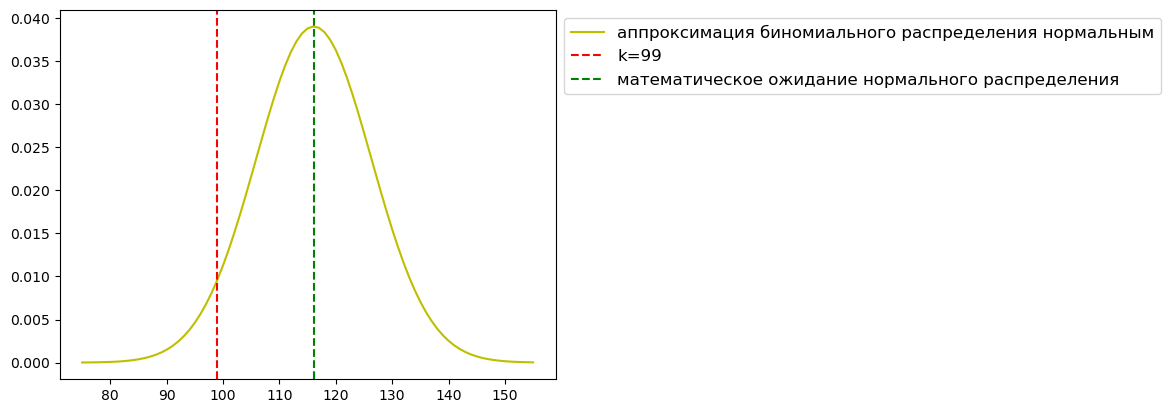

In [43]:
n = 1000 # количество экспериментов
p = 0.1 # вероятность успеха
k = 99 # количество клиентов, при котором план не выполнен
binom_cdf = 0.05 # вероятность неуспеха
 
while binom_cdf < binom.cdf(k, n, p): # вычисляем количество промокодов
    n += 1
print('При раздаче промокодов в количестве:',n,
      'штук вероятность, не выполнить план меньше: {:.1%}'.format(binom.cdf(k, n, p)))

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# границы промежутка, в котором будем строить аппроксимацию -
# от mu минус 4 ст.отклонения бином.распределения
# до mu плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(mu - 4 * sigma)
right = int(mu + 4 * sigma)
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x_ticks = list(range(max(0, left), right)) 
 
plt.plot(x_ticks, st.norm.pdf(x_ticks, mu, sigma), 'y-',
label='аппроксимация биномиального распределения нормальным')
plt.axvline(x=k, color='red', linestyle ='--', label='k=99')
plt.axvline(x=mu, color='green', linestyle ='--',
label='математическое ожидание нормального распределения')
plt.legend(fontsize=12, bbox_to_anchor=(1,1), loc='upper left')
plt.show()

<div class="alert alert-info"> <b>Вывод:</b>

- Необходимо разослать 1161 промокод на продление подписки, чтобы 100 человек продлили подписку (вероятность успеха 10%), при этом вероятность неуспеха составила не более 5%. 
</div>  

### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Вероятность открытия сообщений: 15.37%


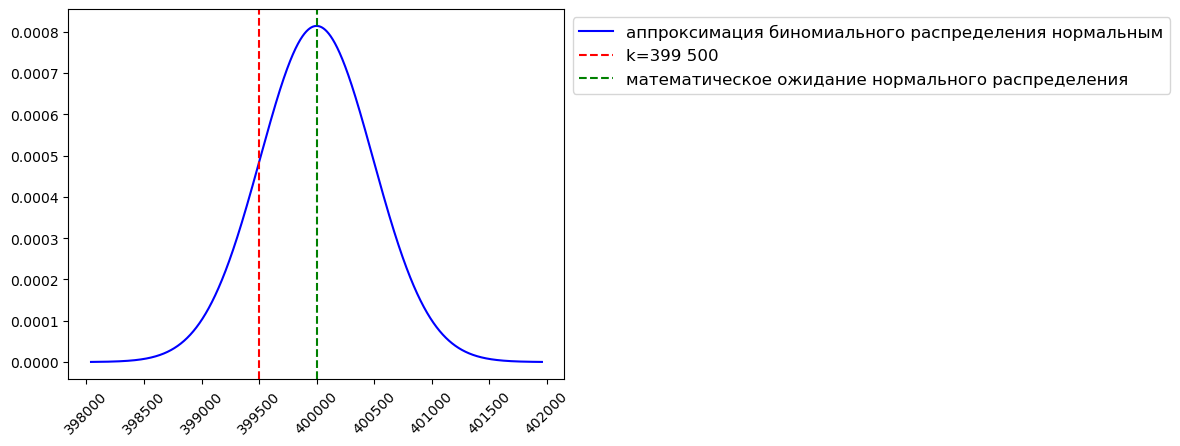

In [44]:
# параметры биномиального распределения
n = 1000000 # количество экспериментов
p = 0.4 # вероятность успеха
k = 399500 # заданное значение, для которого расчитывается вероятность

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# задаём нормальное распределение
distr = st.norm(mu, sigma) 
 
# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(k)
print('Вероятность открытия сообщений: {:.2%}'.format(result))
# границы промежутка, в котором будем строить аппроксимацию -
# от mu минус 4 ст.отклонения бином.распределения
# до mu плюс 4 ст.отклонения бином.распределения
left = int(mu - 4 * sigma)
right = int(mu + 4 * sigma)
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right)) 
plt.plot(x, st.norm.pdf(x, mu, sigma), 'b-', label='аппроксимация биномиального распределения нормальным')
plt.xticks(rotation=45)
plt.axvline(x=k, color='red', linestyle ='--', label='k=399 500')
plt.axvline(x=mu, color='green', linestyle ='--', label='математическое ожидание нормального распределения')
plt.legend(fontsize=12, bbox_to_anchor=(1,1), loc='upper left')
plt.show()

<div class="alert alert-info"> <b>Вывод:</b>

- При рассылке одного миллиона уведомлений (вероятность успеха(прочтения) 40%), вероятность того, что уведомление откроют не более 399,5 тыс. пользователей составит 15,37%. 
</div>  